In [1]:
## Objective
# Build a weighted ranking model to identify
# truly top-performing movies.


In [2]:
# Load Clean Data
import pandas as pd
import numpy as np

df = pd.read_csv("../data/clean_movies.csv")

In [3]:
# IMDB Style Weighted Rating
C = df['Rating(10)'].mean()
m = df['Votes'].quantile(0.75)

In [4]:
# Formula
def weighted_rating(x):
    v = x['Votes']
    R = x['Rating(10)']
    return (v/(v+m) * R) + (m/(v+m) * C)

qualified = df[df['Votes'] >= m].copy()
qualified['Weighted Rating'] = qualified.apply(weighted_rating, axis=1)

qualified.sort_values('Weighted Rating', ascending=False)[['Movie Name','Weighted Rating']].head(10)

,Movie Name,Weighted Rating
629,Uncharted 2: Among Thieves,9.365304
19756,Alpha Bravo Charlie,9.092622
19353,Alpha Bravo Charlie,9.092622
17079,Coke Studio,9.085349
3754,Coke Studio,9.085349
17922,Mirror Game,9.071389
719,The Legend of Hanuman,9.041792
16904,Aloko Udapadi,9.001279
11658,Jibon Theke Neya,8.957871
13920,Maya Bazaar,8.947234


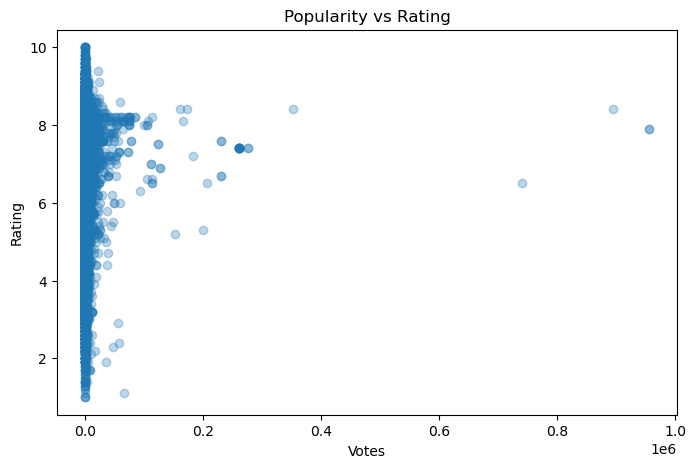

In [5]:
# Popularity vs Rating Scatter
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df['Votes'], df['Rating(10)'], alpha=0.3)
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.title("Popularity vs Rating")
plt.show()

In [6]:
# Duration
df.groupby(pd.cut(df['Timing(min)'], bins=5))['Rating(10)'].mean()

C:\Users\YASWANTH\AppData\Local\Temp\ipykernel_27184\1271552765.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df['Timing(min)'], bins=5))['Rating(10)'].mean()


Timing(min)
(1.066, 188.8]    6.317747
(188.8, 375.6]    6.771951
(375.6, 562.4]    7.800000
(562.4, 749.2]    7.133333
(749.2, 936.0]    7.900000
Name: Rating(10), dtype: float64